<a href="https://colab.research.google.com/github/Samuelmm15/LPN-on-R/blob/main/P3_Tutorizada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Intalar librerias
if (!requireNamespace("tm"))
  install.packages("tm")
if (!requireNamespace("wordcloud"))
  install.packages("wordcloud")
if (!requireNamespace("lsa"))
  install.packages("lsa")

Loading required namespace: lsa

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘SnowballC’




In [4]:
#
# CARGA LIBRERIA Y DATOS
# --------------------------------------------------------------
library(tm)
library(wordcloud)

Loading required package: NLP

Loading required package: RColorBrewer



In [6]:
library(tm) # Text Mining Package
library(wordcloud) #Word Clouds
txt <- readLines("Constitucion.txt",encoding="UTF-8")
txt = iconv(txt, to="ASCII//TRANSLIT")
# El fichero Constitucion.txt aparece en Datos del PLN

In [7]:
corpus <- Corpus(VectorSource(txt))
corpus

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 4075

In [8]:
# Grupo de transformaciones
d<- tm_map(corpus, content_transformer(tolower))
d <- tm_map(d, stripWhitespace)
d <- tm_map(d, removePunctuation)
d <- tm_map(d, removeNumbers)

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(d, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(d, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(d, removeNumbers):
“transformation drops documents”


In [9]:
# Palabras vacías de la biblioteca
d <- tm_map(d, removeWords, stopwords("spanish"))
# Palabras vacías personalizadas y lo convierte a ASCII
sw <- readLines("stopwords.es",encoding="UTF-8")
sw = iconv(sw, to="ASCII//TRANSLIT")
d <- tm_map(d, removeWords, sw)
# El fichero stopwords.es aparece en Datos del PLN

Warning message in tm_map.SimpleCorpus(d, removeWords, stopwords("spanish")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(d, removeWords, sw):
“transformation drops documents”


In [ ]:
tdm <- TermDocumentMatrix(d)
tdm
# convierte a una matriz
m = as.matrix(tdm)
m

In [ ]:
# conteo de palabras en orden decreciente
wf <- sort(rowSums(m),decreasing=TRUE)
wf
# crea un data frame con las palabras y sus frecuencias
dm <- data.frame(word = names(wf), freq=wf)
dm
# Frecuencia mínima igual a 20
findFreqTerms(tdm, lowfreq=20)

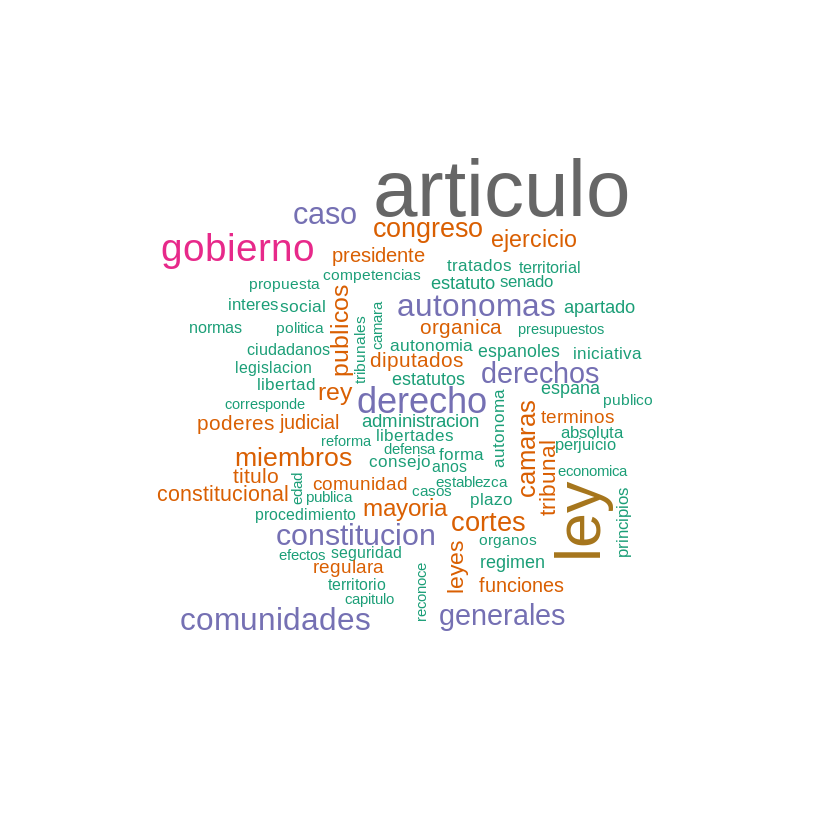

In [18]:
wordcloud(dm$word, dm$freq,
random.order=TRUE, colors=brewer.pal(8,
"Dark2"), max.words=80)

In [38]:
library(lsa)
# create some files
td = tempfile()
dir.create(td)
write( c("dog", "cat", "mouse"),
file=paste(td, "D1", sep="/"))
write( c("hamster", "mouse", "sushi"), file=paste(td, "D2", sep="/"))
write( c("dog", "monster", "monster"), file=paste(td, "D3", sep="/"))
write( c("dog", "mouse", "dog"), file=paste(td, "D4", sep="/"))

In [39]:
# read files into a document-term matrix
myMatrix = textmatrix(td, minWordLength=1)
myMatrix

         docs
terms     D1 D2 D3 D4
  cat      1  0  0  0
  dog      1  0  1  2
  mouse    1  1  0  1
  hamster  0  1  0  0
  sushi    0  1  0  0
  monster  0  0  2  0

In [40]:
# create the latent semantic space
myLSAspace = lsa(myMatrix, dims=dimcalc_raw())
myLSAspace

$tk
               [,1]        [,2]       [,3]       [,4]
cat     -0.16220124  0.15047325  0.1291474  0.9017524
dog     -0.79793919 -0.03095791  0.3677082 -0.3254431
mouse   -0.46528933  0.49421852 -0.1934111  0.1303746
hamster -0.06854554  0.23775471 -0.5532386 -0.1071876
sushi   -0.06854554  0.23775471 -0.5532386 -0.1071876
monster -0.33330566 -0.78682454 -0.4455984  0.2023697

$dk
         [,1]       [,2]       [,3]        [,4]
D1 -0.4808393  0.3038923  0.1979623  0.79828186
D2 -0.2032006  0.4801639 -0.8480261 -0.09488850
D3 -0.4940359 -0.7945263 -0.3415155  0.08957453
D4 -0.6952924  0.2140561  0.3535955 -0.58797844

$sk
[1] 2.9644616 2.0195769 1.5328399 0.8852562

attr(,"class")
[1] "LSAspace"

In [41]:
# display it as a textmatrix again
round(as.textmatrix(myLSAspace),2) # should give the original

        D1 D2 D3 D4
cat      1  0  0  0
dog      1  0  1  2
mouse    1  1  0  1
hamster  0  1  0  0
sushi    0  1  0  0
monster  0  0  2  0

In [42]:
# create the latent semantic space
myLSAspace = lsa(myMatrix, dims=dimcalc_share())
myLSAspace

$tk
               [,1]        [,2]
cat     -0.16220124  0.15047325
dog     -0.79793919 -0.03095791
mouse   -0.46528933  0.49421852
hamster -0.06854554  0.23775471
sushi   -0.06854554  0.23775471
monster -0.33330566 -0.78682454

$dk
         [,1]       [,2]
D1 -0.4808393  0.3038923
D2 -0.2032006  0.4801639
D3 -0.4940359 -0.7945263
D4 -0.6952924  0.2140561

$sk
[1] 2.964462 2.019577

attr(,"class")
[1] "LSAspace"

In [43]:
# display it as a textmatrix again
myNewMatrix = as.textmatrix(myLSAspace)
myNewMatrix # should look be different!

                  D1         D2           D3        D4
cat      0.323556998  0.2436250 -0.003898531 0.3993739
dog      1.118406354  0.4506422  1.218297522 1.6313033
mouse    0.966555903  0.7595387 -0.111586760 1.1726914
hamster  0.243624962  0.2718479 -0.281114472 0.2440658
sushi    0.243624962  0.2718479 -0.281114472 0.2440658
monster -0.007797061 -0.5622289  1.750687134 0.3468525

In [44]:
# compare two terms with the cosine measure
cosine(myNewMatrix["dog",], myNewMatrix["sushi",])

0.3652596


In [45]:
# compare two documents with pearson
cor(myNewMatrix[,1], myNewMatrix[,2], method="pearson")

[1] 0.7716535

In [47]:
# Calcular la correlación de Spearman
cor(myNewMatrix[,1], myNewMatrix[,2], method = "spearman")

[1] 0.7714286

In [48]:
cor(myNewMatrix[,1], myNewMatrix[,2], method = "kendall")

[1] 0.6

In [35]:
# clean up
unlink(td, recursive=TRUE)